In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd drive/MyDrive/Assignments

/content/drive/MyDrive/Assignments


In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.cluster import AgglomerativeClustering,KMeans,DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
crime=pd.read_csv("crime_data.csv")
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [8]:
scaler=MinMaxScaler()
new_feature=scaler.fit_transform(crime.iloc[:,1:5])
new_feature

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891],
       [1.        , 0.56849315, 0.47457627, 0.47803618],
       [0.27108434, 0.00342466, 0.86440678, 0.33333333],
       [0.10843373, 0.25684932, 0.37288136, 0.17829457],
       [0.57831325, 0.69863014, 0.86440678, 0.43152455],
       [0.38554217, 0.23287671, 0.55932203, 0.35400517],
       [0.08433735, 0.03767123, 0.42372881, 0.10335917],
       [0.31325301, 0.23972603, 0.57627119, 0.27648579],
       [0.53614458, 0.21917808, 0.33898305, 0.23255814],
       [0.87951807, 0.69863014,

Hierarchical

In [9]:
model1=AgglomerativeClustering(n_clusters=5,affinity="euclidean",linkage="complete")
cluster_model1=model1.fit_predict(new_feature)
cluster_model1

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([3, 4, 1, 0, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       0, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 0, 0])

In [10]:
nc=range(2,30)
l=[]
for i in nc:
  model=AgglomerativeClustering(n_clusters=i)
  cluster_numbers=model.fit_predict(new_feature)
  l.append(silhouette_score(new_feature,cluster_numbers))

<ipython-input-11-217511ad75d5>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


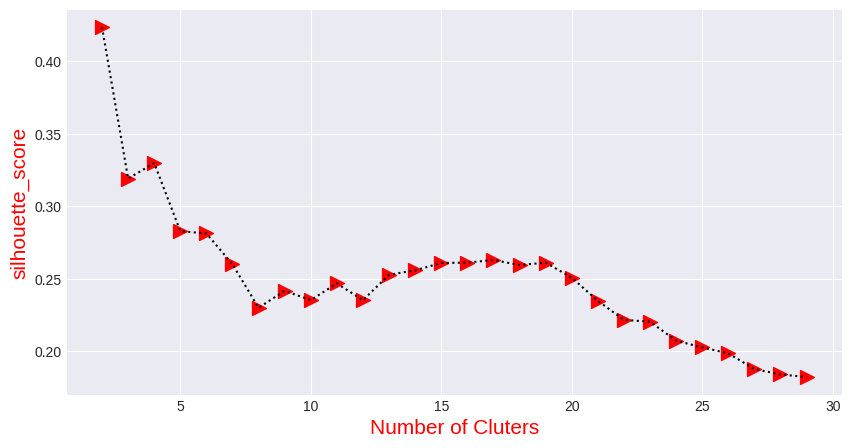

In [11]:
plt.figure(figsize=(10,5))
plt.style.use("seaborn-darkgrid")
plt.plot(nc,l,linestyle=":",color="black")
plt.scatter(nc,l,s=100,marker='>',color="red")
plt.xlabel("Number of Cluters",size=15, color="red")
plt.ylabel("silhouette_score",size=15, color="red")
plt.show()

K-Means

In [ ]:
model2=KMeans(n_clusters=5)
cluster_numbers=model2.fit_predict(new_feature)
cluster_numbers

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 3, 3, 4, 3, 3, 2, 2, 3, 1, 2, 0, 3, 4, 0, 4, 4, 1, 0, 3, 2, 3,
       0, 1, 4, 4, 4, 3, 0, 2, 3, 3, 1, 0, 2, 4, 4, 2, 2, 1, 0, 1, 3, 2,
       0, 4, 2, 0, 0, 4], dtype=int32)

Elbow Method

In [ ]:
nc=range(1,10)
l1=[]
for i in nc:
  model=KMeans(n_clusters=i)
  cluster_numbers=model.fit_predict(new_feature)
  l1.append(model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<ipython-input-61-0c511669f41d>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


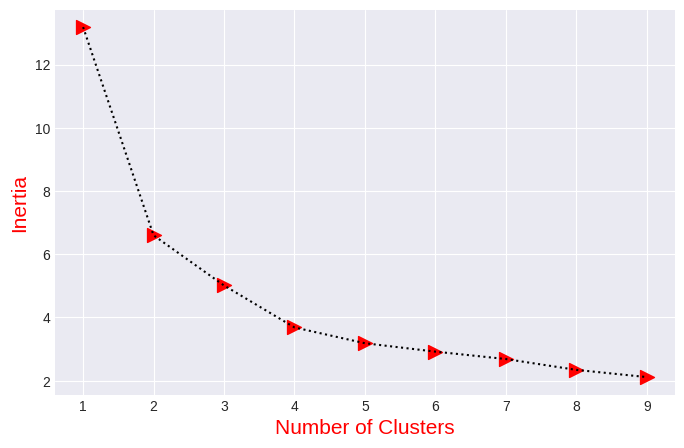

In [ ]:
plt.figure(figsize=(8,5))
plt.style.use("seaborn-darkgrid")
plt.plot(nc,l1,linestyle=":",color="black")
plt.scatter(nc,l1,s=100,marker=">",color="red")
plt.xticks(nc)
plt.xlabel("Number of Clusters",size=15, color="red")
plt.ylabel("Inertia",size=15, color="red")
plt.show()

DBSCAN

In [ ]:
new_data=crime.drop(["Unnamed: 0"],axis=1,inplace=True)

In [ ]:
new_data=crime

In [ ]:
std_norm=StandardScaler().fit_transform(new_data)

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [ ]:
model2=DBSCAN(min_samples=4,eps=1)
cluster_numbers2=model2.fit_predict(std_norm)
crime['cluster_numbers2']=cluster_numbers2

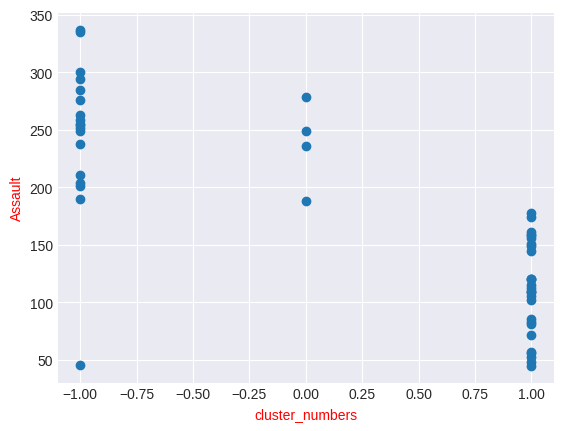

In [ ]:
plt.scatter(crime["cluster_numbers2"],crime["Assault"])
plt.xlabel("cluster_numbers",size=10,color="red")
plt.ylabel("Assault",size=10,color="red")
plt.show()